# Модуль 1, Спринт 4, Сборный Проект 1

Выполнил Козлов Данила студент 20 когорты DA

# Описание проекта


Вы работаете в интернет-магазине «**Стримчик**», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, **Xbox** или **PlayStation**). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура **ESRB** (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. **ESRB** оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы долларов)
* `EU_sales` — продажи в Европе (миллионы долларов)
* `JP_sales` — продажи в Японии (миллионы долларов)
* `Other_sales` — продажи в других странах (миллионы долларов)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Первичный осмотр данных

In [1]:
!pip install seaborn -U

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt
from scipy import stats as st
#import matplotlib.ticker as mtick
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
sns.__version__

'0.11.1'

In [4]:
df = pd.read_csv('datasets/games.csv')

In [5]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11422,NHL 06,GC,2005.0,Sports,0.06,0.02,0.00,0.00,78.0,9.3,E10+
16629,Shirogane no Soleil: Contract to the Future - ...,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
15746,The Hustle: Detroit Streets,XB,2006.0,Sports,0.01,0.00,0.00,0.00,52.0,tbd,T
900,The Sims: Makin' Magic,PC,2003.0,Simulation,1.03,0.80,0.00,0.09,80.0,8.6,T
2400,Fight Night Round 2,PS2,2005.0,Fighting,0.72,0.03,0.00,0.12,88.0,9,T
3474,Fire Emblem: Seisen no Keifu,SNES,1996.0,Strategy,0.00,0.00,0.58,0.00,NaN,NaN,NaN
13503,Lux-Pain,DS,2008.0,Adventure,0.04,0.00,0.00,0.00,48.0,6.2,T
10620,Resident Evil: Revelations 2,XOne,2015.0,Action,0.07,0.02,0.00,0.01,75.0,7.5,M
7500,Wedding Dash,DS,2009.0,Action,0.19,0.00,0.00,0.01,NaN,tbd,E
2950,Mappy,NES,1984.0,Platform,0.00,0.00,0.69,0.00,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.isna().sum().reset_index().rename(columns ={0: 'nan_num'}).merge(df.isna().mean().reset_index(), on = 'index').rename(columns ={0: 'nan_part', 'index': 'column'})

,column,nan_num,nan_part
0,Name,2,0.000120
1,Platform,0,0.000000
2,Year_of_Release,269,0.016093
3,Genre,2,0.000120
4,NA_sales,0,0.000000
5,EU_sales,0,0.000000
6,JP_sales,0,0.000000
7,Other_sales,0,0.000000
8,Critic_Score,8578,0.513192
9,User_Score,6701,0.400897


Сразу видим, что есть множество пропусков в столбцах `Critic_Score`, `User_Score`, `Rating` что не очень хорошо. Также доля этих пропусков составляет почти половину датасета.

Ещё не очень хороший момент - название столбцов начинаются с заглавных букв, это необходимо исправить.

Год выпуска игры `Year_of_Release` хорошо бы сделать целочисленным, но из-за пропусков там остается `float`.   


# Шаг 2. Предобработка данных 

## Замена названий столбцов

In [8]:
columns_names = list(map(str.lower,df.columns))
print(columns_names)

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [9]:
df.columns = columns_names

In [10]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Преобразовали все названия столбцов к нижнему регистру. Теперь названия соответствуют всем правилам и дополнительной обработки не требуется.

## Преобразования данных к нужным типам данных

### Столбец `year_of_release`

In [11]:
print(df.year_of_release.dtype)
df[df.year_of_release.isna()] 

float64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
df.year_of_release.value_counts(dropna = False)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [13]:
min_year = df.year_of_release.min()
max_year = df.year_of_release.max()
print(f"Разброс времени: {min_year} - {max_year}")

Разброс времени: 1980.0 - 2016.0


Чтобы заменить год на целочисленное значение, пока что сделаем техническую замену на -9999 заместо nan, чтобы это число отражалось в сводниках. Ну и выписал диапазон времени на всякий случай.

In [14]:
try:
    df.year_of_release = df.year_of_release.fillna(-9999)
    df.year_of_release = df.year_of_release.astype('int')
except:
    print('Ошибка при преобразовании данных')

In [15]:
df.year_of_release.dtypes

dtype('int32')

#### Вывод:

Сделал техническую замену пропущенных значений на -9999 и преобразовал столбец к целочисленному виду.
С чем связаны пропуски понять пока точно не могу, но скорее всего либо выход игры был на разных платформах в разное время, либо просто пропустили данные. Пропуски составляют малую часть датасета, так что в случае чего их можно потом будет просто удалить. Но это вопрос не текущего задания.

### Столбец `user_score`

In [16]:
print(df.user_score.unique())
print()
print('Количество пустых записей:', df.user_score.isna().sum())
print("Тип данных:", df.user_score.dtype)

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

Количество пустых записей: 6701
Тип данных: object


Здесь явно видим, что есть много пустых записей, к тому же есть ещё очень странная записть 'tbd', нужно для начала понять что это.

In [17]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,-9999,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


WHAT DOES "**TBD**" MEAN?  
**To Be Determined.**

To help ensure that METASCORES accurately reflect the reviews given by critics for any particular movie, game, television show or album, we do not display a METASCORE for those items that do not have at least four (4) reviews in our database. Once this minimum number of reviews is reached, the METASCORE will display.

Загуглил и получил некоторое пояснение для этой величины: Те игры, которые не набрали 4 ревью где-нибудь на телевидении или ещё где-нибудь не отображаются в базе данных, так как это может повлиять на покупку игры или тому подобное.

Ну объяснение я получил, но мне это никак не поможет, так как заменить это значение на какое-нибудь числовое я никак не могу, иначе это сильно повлияет на выборку. Единственное можно также заменить это значение на nan, чтобы было все однотипно. Но пока оставлю, если дальше при анализе понадобится, то заменю на nan.

## Обработка пропусков

### Столбцы `name` и `genre`

In [18]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ну как видно отсюда, что для этих двух игр почти все значения Nan, так что избавимся от этих записей без сожалений.

In [19]:
df = df[~df.name.isna()]

In [20]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### Вывод:

Как видно, избавились от 2 пустых записей и теперь имеем более менее полный датасет, осталось разобраться с пропусками в рейтингах.

### Столбец `critic_score`

In [21]:
df[df.critic_score.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


----

Вижу, что здесь в трех оценках имеется много общих пропусков?  
Интересно сколько общих пропусков в таблице по трем столбцам?

In [22]:
mask = df.critic_score.isna() & ((df.user_score.isna()) | (df.user_score == "tbd")) & df.rating.isna()
print(len(df[mask]))

6665


Оказывается мнение критиков очень весомое... Ну или при cборе данных эти данные взаимосвязаны. 

In [23]:
df[['critic_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
critic_score,8137.0,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0


In [24]:
(df.query('user_score != "tbd"')[['user_score']].astype('float') * 10).describe().T

,count,mean,std,min,25%,50%,75%,max
user_score,7590.0,71.250461,15.000061,0.0,64.0,75.0,82.0,97.0


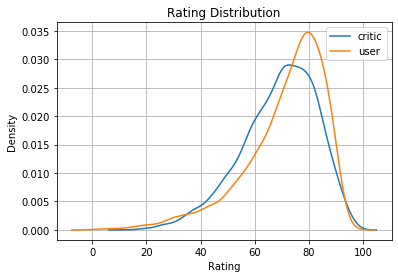

In [25]:
ax = sns.kdeplot(df.critic_score, label = 'critic')
sns.kdeplot((df.query('user_score != "tbd"').user_score.astype('float') * 10), label = 'user', ax = ax)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()

Построил по имеющимся данным графики распределения оценок критиков и пользователей для игр.  
Как видно из графика, оценка критиков в среднем чуть ниже около 70 баллов, чем оценка пользователей, которая в среднем составляет 80 баллов.

#### Вывод:

Заменить пропущенные значения в столбце не представляется возможным, так как это сильно повлияет на выборку.

### Столбец `rating`

In [26]:
df.rating.describe()

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

In [27]:
df.rating.value_counts(dropna = False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Видно, что очень много пропусков в определении возрастной категории, так что пока заменю эти пропуски как отдельную категорию "Неопределён", так они будут корректно обрабатываться

In [28]:
df.rating = df.rating.fillna("Неопределён")
df.rating.value_counts(dropna = False)

Неопределён    6764
E              3990
T              2961
M              1563
E10+           1420
EC                8
K-A               3
RP                3
AO                1
Name: rating, dtype: int64

#### Вывод:

Так как это категориальная переменная, то заменил пропущенные данные на значение "Неопределён"

Также можно заметить очень малочисленные категории EC, RP, K-A, AO. Пока оставим их как есть, но нужно учитывать их при дальнейшем анализе.

## Расчет суммарных продаж по всем регионам

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Так как данные по всем продажам имеются, то просто сложим вырочку с каждого региона и получим полную вырочку.

In [29]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Неопределён,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Неопределён,31.38


# Шаг 3. Проведите исследовательский анализ данных

## Исследование года релиза игр

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [30]:
df.year_of_release.value_counts()

 2008    1427
 2009    1426
 2010    1255
 2007    1197
 2011    1136
 2006    1006
 2005     939
 2002     829
 2003     775
 2004     762
 2012     653
 2015     606
 2014     581
 2013     544
 2016     502
 2001     482
 1998     379
 2000     350
 1999     338
 1997     289
-9999     269
 1996     263
 1995     219
 1994     121
 1993      60
 1981      46
 1992      43
 1991      41
 1982      36
 1986      21
 1989      17
 1983      17
 1990      16
 1987      16
 1988      15
 1985      14
 1984      14
 1980       9
Name: year_of_release, dtype: int64

Видим, что данные раньше 1994 года очень малочисленны. Там игр выпускалось меньше 100, так что думаю следует рассматривать данные начиная с 1994 года. Также можно выбросить нашу техническую замену -9999 так как это очень маленькая часть выборки

In [31]:
df = df.query('year_of_release != -9999')

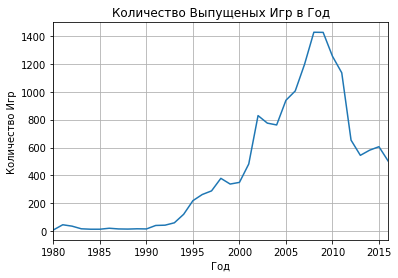

In [32]:
df.year_of_release.value_counts().sort_index().plot(title = 'Количество Выпущеных Игр в Год', grid = True)
plt.xlabel("Год")
plt.ylabel("Количество Игр")
plt.show()

Привел график по выпуску игр в год, видим, что пик приходится на 2008-2009 года. Также виден чёткий предел и плато до 1995 года, в целом можно действительно обрезать картинку до 1995 года.

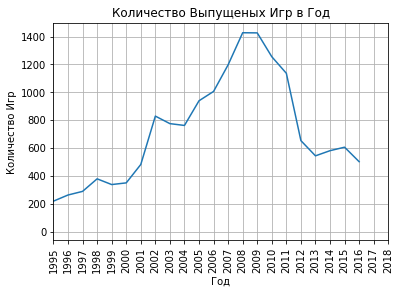

In [33]:
df.year_of_release.value_counts().sort_index().plot(title = 'Количество Выпущеных Игр в Год', xlim = (1995, 2018),grid = True)
plt.xlabel("Год")
plt.ylabel("Количество Игр")
plt.xticks(range(1995,2019), rotation = 90)
plt.show()

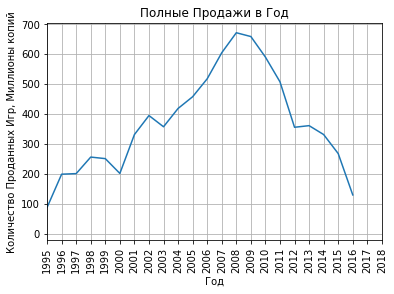

In [34]:
df.groupby('year_of_release').total_sales.sum().plot(title = 'Полные Продажи в Год', xlim = (1995, 2018), grid = True)
plt.xlabel("Год")
plt.ylabel("Количество Проданных Игр, Миллионы копий")
plt.xticks(range(1995,2019), rotation = 90)
plt.show()

### Вывод:

В целом видно, что графики очень похожи и есть сильная корреляция (прямая зависимость от количества выпущенных игр и проданных копий). Единственное отличие (аномалия) - в 2000 году, когда количество игр осталось примерно на том же уровне по сравнению с 1999 годом, а количество проданных копий резко упало на 50 миллионов.  

Ещё одно наблюдение, что после 2009 года идет довольно резкий спад в выпуске игр и продажах соответственно. С чем это связано сказать сложно, но на 2016 год количество проданных копий опустилось почти до уровня 1995 года


## Анализ продаж по различным платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [35]:
print(df.platform.unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [36]:
data = df.groupby('platform').total_sales.count().sort_values(ascending = True).reset_index().rename(columns = {'total_sales': 'games_number'})
data = data.merge(df.groupby('platform').total_sales.sum().reset_index(), on = 'platform')
data

,platform,games_number,total_sales
0,GG,1,0.04
1,PCFX,1,0.03
2,TG16,2,0.16
3,3DO,3,0.10
4,WS,6,1.42
5,SCD,6,1.86
6,NG,12,1.44
7,GEN,27,28.35
8,DC,52,15.95
9,GB,97,254.43


In [37]:
sns.set_context("notebook", font_scale=1.8)
sns.set_style('whitegrid')

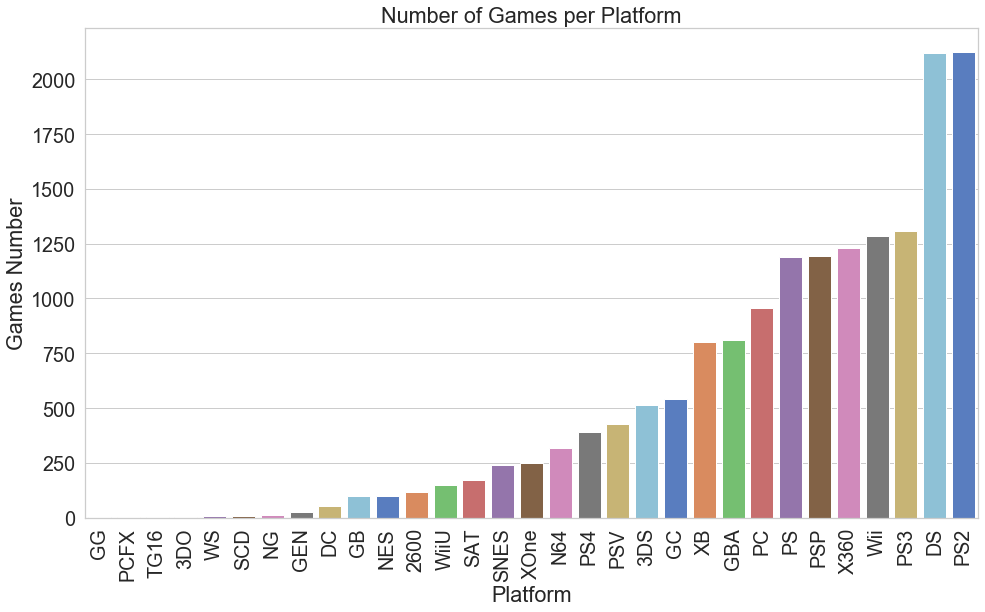

In [38]:
plt.figure(figsize = (16,9))
sns.barplot(data = data, x = 'platform', y = 'games_number', palette = 'muted')
plt.title('Number of Games per Platform')
plt.xlabel('Platform')
plt.ylabel('Games Number')
plt.xticks(rotation = 90)
plt.show()

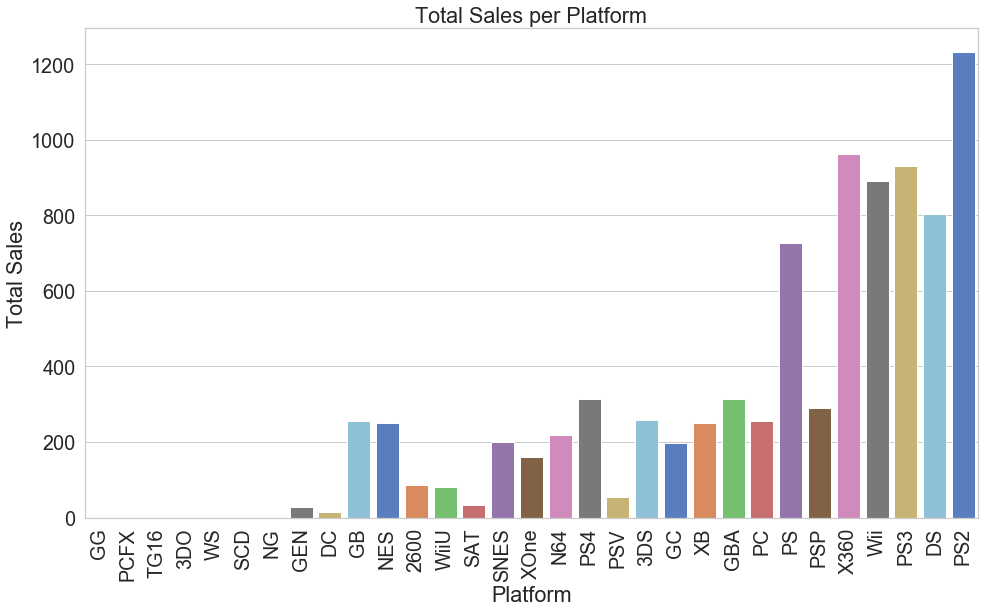

In [39]:
plt.figure(figsize = (16,9))
sns.barplot(data = data, x = 'platform', y = 'total_sales', palette = 'muted')
plt.title('Total Sales per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation = 90)
plt.show()

In [40]:
data.tail(8).sort_values('total_sales')

,platform,games_number,total_sales
23,PC,957,255.76
25,PSP,1193,289.53
24,PS,1190,727.58
29,DS,2121,802.78
27,Wii,1286,891.18
28,PS3,1306,931.34
26,X360,1232,961.24
30,PS2,2127,1233.56


### Вывод №1:
Как видно из распределений у нас по количеству игр в явных лидерах платформы DS, PS2 (по 2120 игр). Дальше идут платформы PS3, Wii, x360, PSP, PS по примерно 1200 игр и завершает линейку платформа PC с 1000 играми.  

По продажам имеем несколько иную картину:
У нас по продажам явный лидер - платформа PS2, Дальше за ней идут X360, PS3, Wii и DS. В итоге имеем 6 лидеров по продажам, с ними дальше и будем иметь дело.  
Компьютерная платформа PC по продажам очень сильно уступает по продажам игровым приставкам.

In [41]:
sales_leaders = ['PS2','X360','PS3','Wii','DS','PS']
data = df.query('platform in @sales_leaders')
data = data.groupby(['year_of_release', 'platform']).total_sales.sum().reset_index()

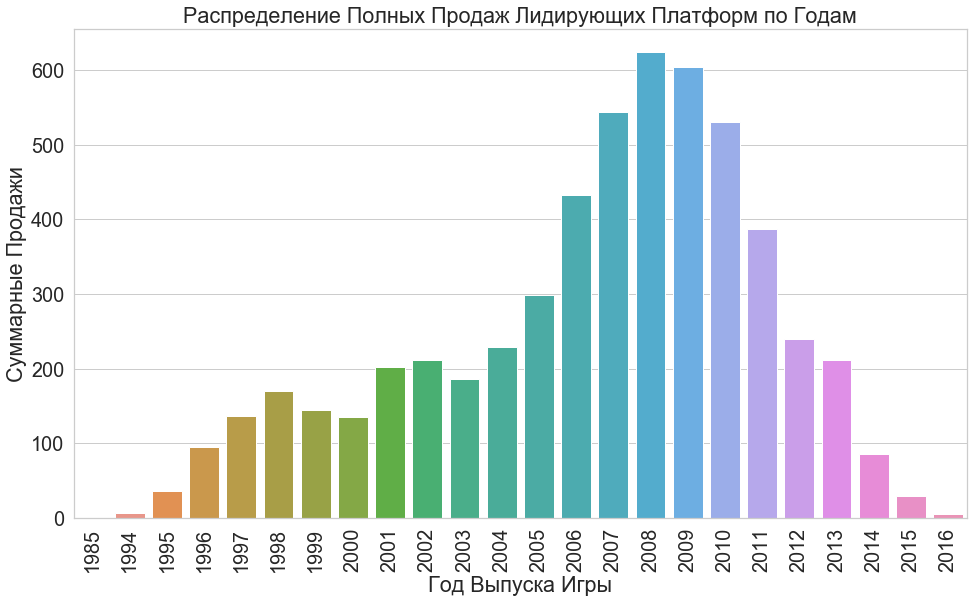

In [42]:
plt.figure(figsize = (16,9))
sns.barplot(data = data, x = 'year_of_release', y = 'total_sales', estimator = np.sum, ci = None)
plt.title('Распределение Полных Продаж Лидирующих Платформ по Годам')
plt.xlabel('Год Выпуска Игры')
plt.ylabel('Суммарные Продажи')
plt.xticks(rotation = 90)
plt.show()

In [43]:
#df.query('platform in @sales_leaders').groupby(['year_of_release', 'platform']).total_sales.sum().reset_index()

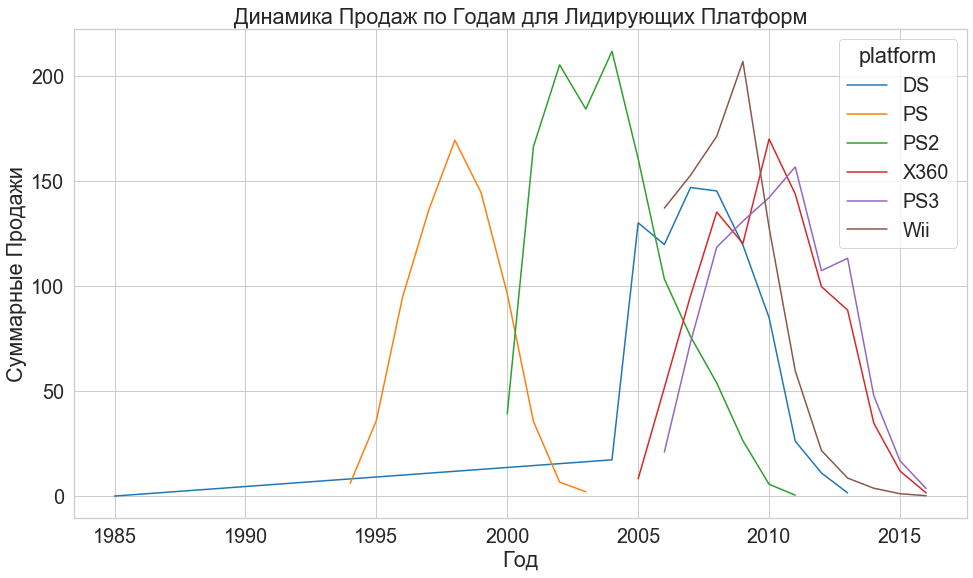

In [44]:
plt.figure(figsize = (16,9))
sns.lineplot(data = data, x = 'year_of_release', y = 'total_sales', hue = 'platform')
plt.title('Динамика Продаж по Годам для Лидирующих Платформ')
plt.xlabel('Год')
plt.ylabel('Суммарные Продажи')
plt.show()

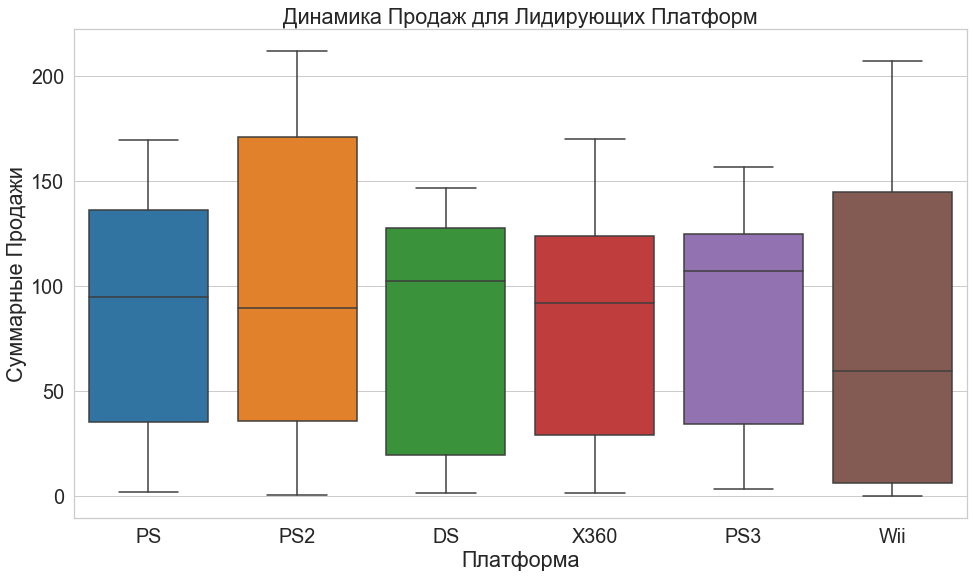

In [45]:
plt.figure(figsize = (16,9))
sns.boxplot(data = data.query('year_of_release > 1994'), x = 'platform', y = 'total_sales')
plt.title('Динамика Продаж для Лидирующих Платформ')
plt.xlabel('Платформа')
plt.ylabel('Суммарные Продажи')
plt.show()

### Вывод №2

Построили графики по продажам для лидирующих платформ в общем и для каждой платформы отдельно. 

Сразу увидели аномалию что есть запись датируемая 1985 годом для приставки DS, когда она появилась только в 2004 году, далее эту запись удалим.  

На графике хорошо видна серия для платформ PS. Время жизни для платформы PS около 10 лет, также видно, что Когда падают продажи и выходит новая версия PS2 или PS3 то через 3 года продажи для предыдущих версий прекращаются, но идёт качественный скачок продаж для новых версий.

In [46]:
df.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Неопределён,0.02


In [47]:
df = df.drop(15957)

In [48]:
df.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [49]:
data.groupby(['year_of_release']).total_sales.sum().reset_index()#.pivot_table(columns = 'year_of_release')

,year_of_release,total_sales
0,1985,0.02
1,1994,6.03
2,1995,35.96
3,1996,94.70
4,1997,136.17
5,1998,169.49
6,1999,144.53
7,2000,135.54
8,2001,202.02
9,2002,212.05


In [50]:
platform_lifetime = df.groupby('platform').year_of_release.agg(['min','max'])
platform_lifetime.columns = ['min_year','max_year']
platform_lifetime['lifetime'] = platform_lifetime.max_year - platform_lifetime.min_year + 1
platform_lifetime = platform_lifetime.sort_values(['min_year','lifetime'])
platform_lifetime

,min_year,max_year,lifetime
platform,,,
2600,1980,1989,10
NES,1983,1994,12
PC,1985,2016,32
GB,1988,2001,14
GEN,1990,1994,5
SNES,1990,1999,10
GG,1992,1992,1
SCD,1993,1994,2
NG,1993,1996,4


Получили интересную табличку с временем жизни платформы. Сразу видно, что есть некоторые платформы, у которых время жизни равно одному году. Соответственно платформа появилась, затем в этом же году исчезла или на неё больше не выпускали игр.  

Также есть абсолютный лидер - Компьютер, на нем игры выходят с 1985 года и по сей день.  

Ещё присутствуют новые платформы, по которым в силу ограниченности данных до 2016 года нельзя оценить время жизни (XOne, PS4, WiiU и другие)

In [51]:
sns.set_context('notebook', font_scale = 1)

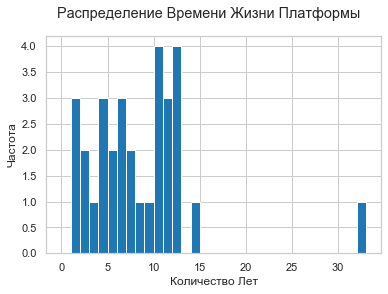

In [52]:
platform_lifetime.lifetime.hist(range = (0,33), bins = 33)
plt.suptitle('Распределение Времени Жизни Платформы')
plt.xlabel('Количество Лет')
plt.ylabel('Частота')
plt.show()

In [53]:
display(platform_lifetime.query('(max_year < 2016) and (lifetime != 1)'))

,min_year,max_year,lifetime
platform,,,
2600,1980,1989,10
NES,1983,1994,12
GB,1988,2001,14
GEN,1990,1994,5
SNES,1990,1999,10
SCD,1993,1994,2
NG,1993,1996,4
3DO,1994,1995,2
SAT,1994,1999,6


In [54]:
platform_lifetime.query('max_year == 2016')

,min_year,max_year,lifetime
platform,,,
PC,1985,2016,32
X360,2005,2016,12
PS3,2006,2016,11
Wii,2006,2016,11
3DS,2011,2016,6
PSV,2011,2016,6
WiiU,2012,2016,5
PS4,2013,2016,4
XOne,2013,2016,4


### Вывод №3:

За какой характерный срок появляются новые и исчезают старые платформы?  

Если судить по линейке xbox, Wii, PS, то характерный срок жизни для данных платформ: 10-12 лет, переход на новую версию платформы происходит в среднем раз в 6 лет

----

## Анализ продаж за актуальный период времени

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  

Не учитывайте в работе данные за предыдущие годы.  

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.  

----

Так как платформы у нас живут в течении 10-12 лет максимум, а новые версии выходят раз в 6 лет, то я возьму данные за последние 7 лет **с 2010 - 2016 год.**  
Там мы четко увидим как заканчивается срок жизни одной платформы и как на смену им идут обновленные и актуальные версии платформ

In [55]:
data = df.query('year_of_release >= 2010')
data = data.groupby(['year_of_release', 'platform']).total_sales.sum().reset_index()
display(data.platform.unique())

array(['DS', 'PC', 'PS2', 'PS3', 'PSP', 'Wii', 'X360', '3DS', 'PSV',
       'WiiU', 'PS4', 'XOne'], dtype=object)

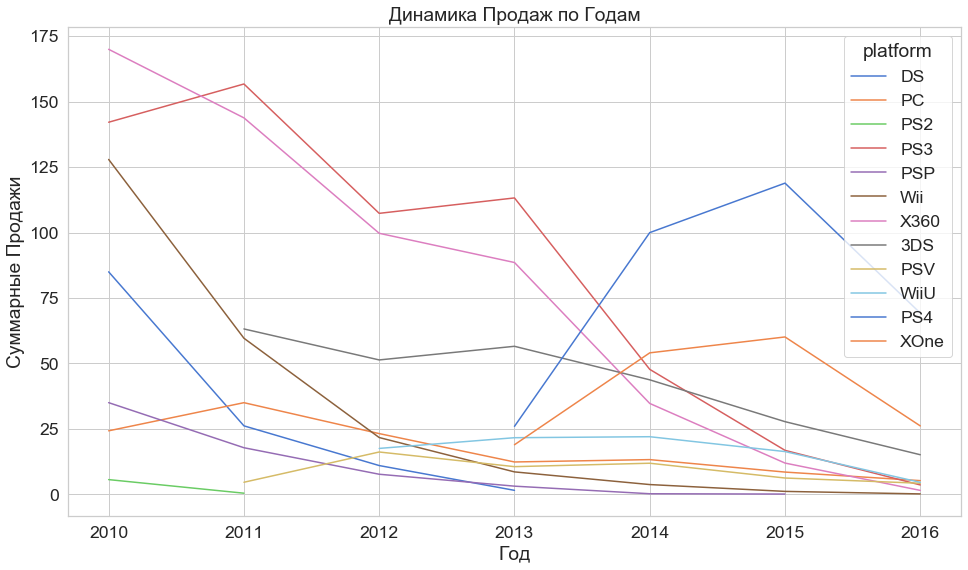

In [56]:
sns.set_context('notebook', font_scale = 1.6)
plt.figure(figsize = (16,9))
sns.lineplot(data = data, x = 'year_of_release', y = 'total_sales', hue = 'platform', palette = 'muted')
plt.title('Динамика Продаж по Годам')
plt.xlabel('Год')
plt.ylabel('Суммарные Продажи')
plt.show()

График получился не совсем наглядным, так как всё ещё достаточно много платформ осталось, но отсюда можно увидеть с какого года действительно стоит рассмотреть, а именно с 2013 года, когда вышли PS4 и XOne.

In [57]:
data = data.query('year_of_release >= 2013')

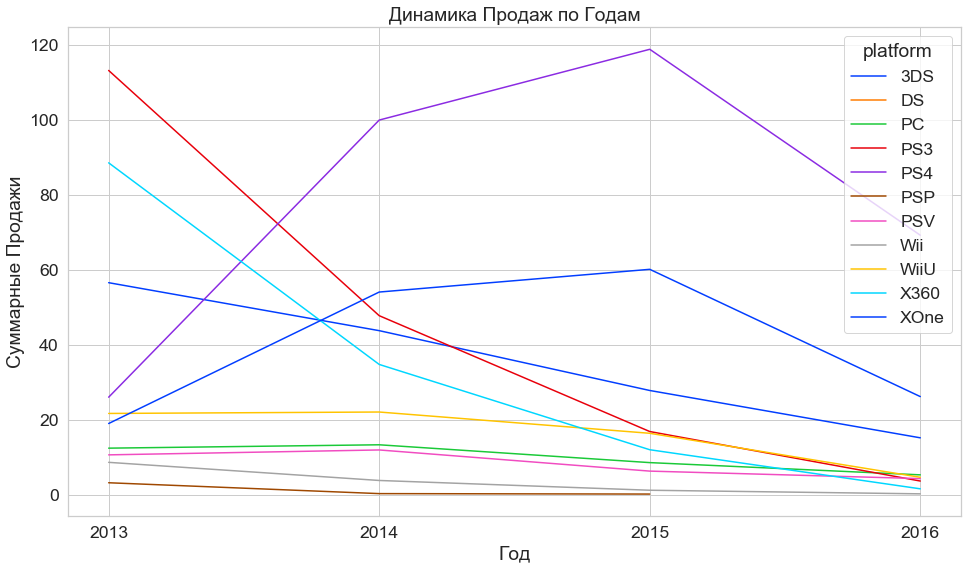

In [58]:
sns.set_context('notebook', font_scale = 1.6)
plt.figure(figsize = (16,9))
sns.lineplot(data = data, x = 'year_of_release', y = 'total_sales', hue = 'platform', palette = 'bright')
plt.title('Динамика Продаж по Годам')
plt.xlabel('Год')
plt.ylabel('Суммарные Продажи')
plt.xticks(range(2013,2017))
plt.show()

Что же можно сказать, видим явный спад продаж для всех платформ. Выделяются новые поколения xbox и SonyPlaystation (XOne и PS4), а также платформы 3DS и WiiU.
Также наш давний игрок PC показывает не такой резкий спад и в 2016 году превосходит по продажам все приставки старого поколения и даже WiiU.

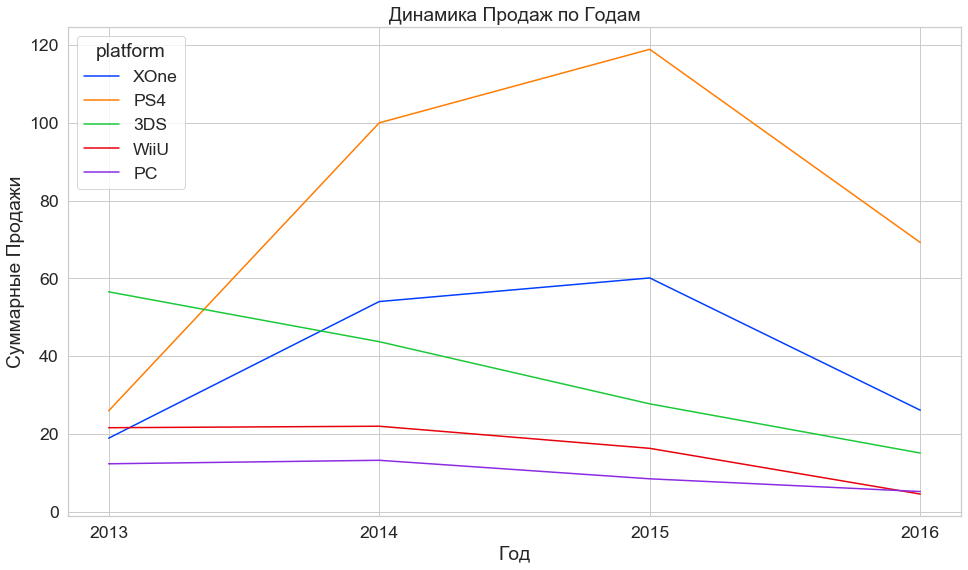

In [59]:
plt.figure(figsize = (16, 9))
sns.lineplot(data = data, x = 'year_of_release', y = 'total_sales', hue = 'platform', palette = 'bright', hue_order = ['XOne','PS4','3DS','WiiU','PC'])
plt.title('Динамика Продаж по Годам')
plt.xlabel('Год')
plt.ylabel('Суммарные Продажи')
plt.xticks(range(2013,2017))
plt.show()

In [60]:
platform_leaders = ['XOne','PS4','3DS','WiiU','PC']

In [61]:
data = df.query('year_of_release >= 2013')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Неопределён,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Неопределён,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Неопределён,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Неопределён,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Неопределён,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Неопределён,0.01


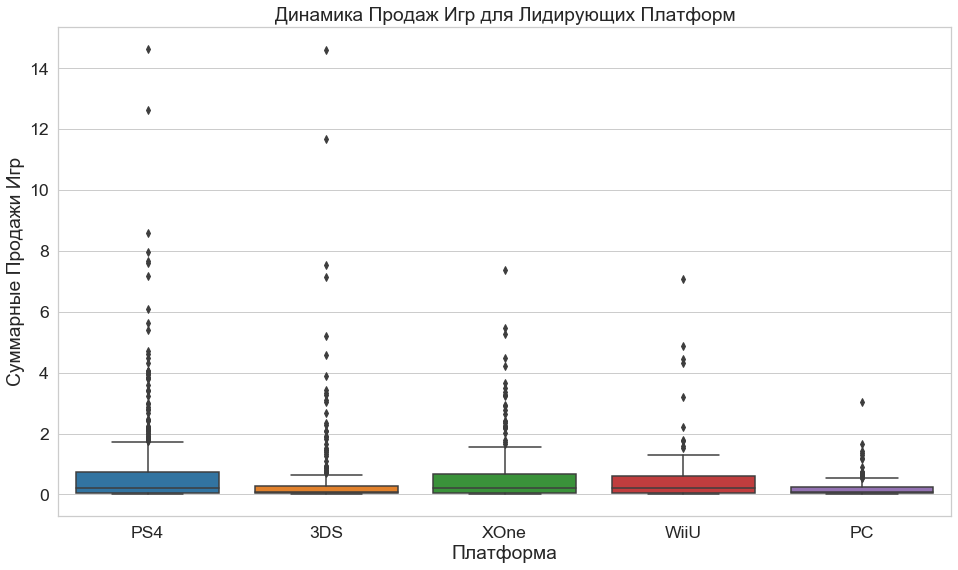

In [62]:
plt.figure(figsize = (16,9))
sns.boxplot(data = data.query('platform in @platform_leaders'), x = 'platform', y = 'total_sales')
plt.title('Динамика Продаж Игр для Лидирующих Платформ')
plt.xlabel('Платформа')
plt.ylabel('Суммарные Продажи Игр')
#plt.ylim(0,2)
plt.show()


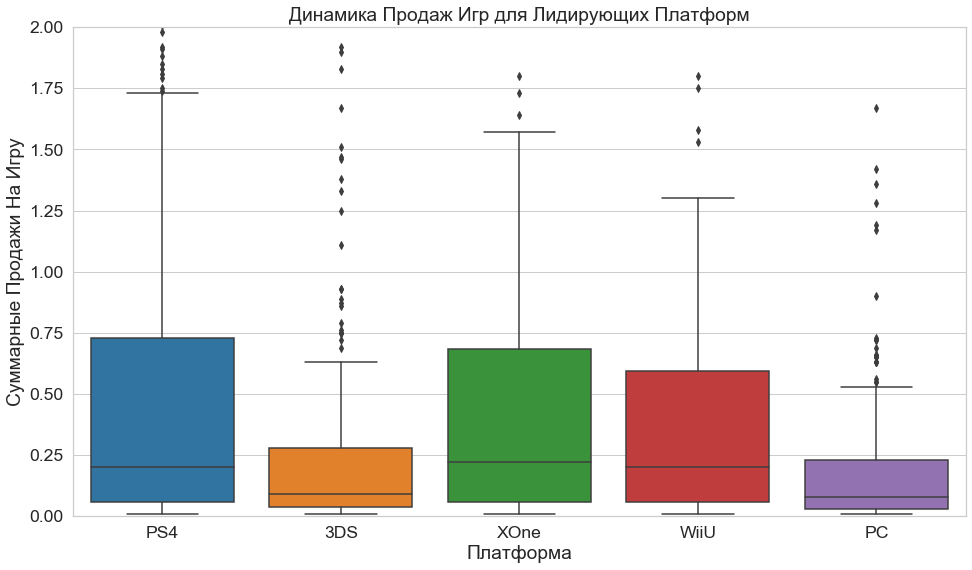

In [63]:
plt.figure(figsize = (16,9))
sns.boxplot(data = data.query('platform in @platform_leaders'), x = 'platform', y = 'total_sales')
plt.title('Динамика Продаж Игр для Лидирующих Платформ')
plt.xlabel('Платформа')
plt.ylabel('Суммарные Продажи На Игру')
plt.ylim(0,2)
plt.show()


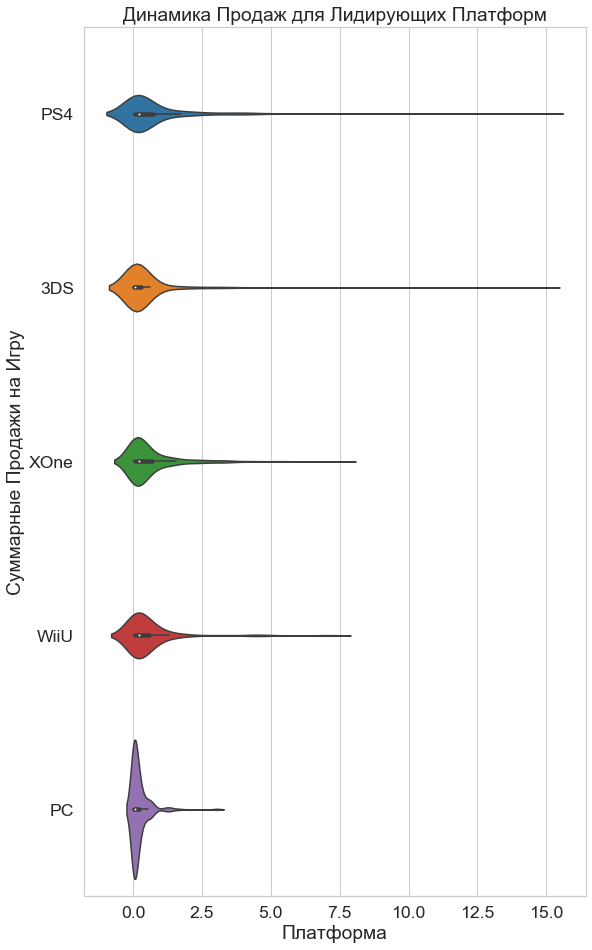

In [64]:
plt.figure(figsize = (9,16))
sns.violinplot(data = data.query('platform in @platform_leaders'), y = 'platform', x = 'total_sales')
plt.title('Динамика Продаж для Лидирующих Платформ')
plt.xlabel('Платформа')
plt.ylabel('Суммарные Продажи на Игру')
#plt.xlim(0,2)
plt.show()

### Вывод:

Наблюдается явный спад продаж для всех платформ. Актуальный период для прогнозов на 2017 год взяли с 2013-2016 гг.  
Были выделены наиболее перспективные платформы *XOne, PS4, 3DS, WiiU, PC*.

Построили ящики с усами и violinplot для данных платформ, чтобы посмотреть как продаются отдельные игры за актуальный промежуток времени.  

* Явно видим, что все продажи по играм не превышают обычно 1.75 миллионов копий. Все что выше - выбросы и скорее всего очень популярные  или эксклюзивные игры для данных платформ (Явно это видно для PS4 и для 3DS, где отдельные игры набрали около 12 и 14 млн копий).  


* Распределения выглядят адекватно, имея пик отличный от нуля и длинный склон вправо. Однако для компьютерной платформы имеется ещё один небольшой пик в районе 1.25 миллионов копий, в отличие от других платформ.


* Лидерами по продажам остаются XOne и PS4. Платформа WiiU имеет примерно такие же продажи за этот промежуток времени, но в динамике мы видели резкий упадок продаж игр на эту платформу в 2016 году, когда количество проданных игр уступила даже платформе PC. 

## Влияние отзывов критиков и пользователей на продажи

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.  

Соотнесите выводы с продажами игр на других платформах.  

---

Возьму для примера платформу PS4 и посмотрю влияние критиков на продажи.

In [65]:
data = df.query('(platform in @platform_leaders) and (year_of_release >= 2013)')[['platform','total_sales','critic_score', 'user_score']]
data.sample()

,platform,total_sales,critic_score,user_score
14400,PC,0.03,86.0,8.7


In [66]:
data.loc[data.user_score == 'tbd', 'user_score'] = np.nan
data.user_score = data.user_score.astype(float) * 10

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 31 to 16692
Data columns (total 4 columns):
platform        1246 non-null object
total_sales     1246 non-null float64
critic_score    711 non-null float64
user_score      754 non-null float64
dtypes: float64(3), object(1)
memory usage: 48.7+ KB


In [68]:
data.query("platform == 'PS4'").dropna().corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


In [69]:
data.query("platform == 'XOne'").dropna().corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.410422,-0.094003
critic_score,0.410422,1.000000,0.472462
user_score,-0.094003,0.472462,1.000000


In [70]:
data.query("platform == 'PC'").dropna().corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.194124,-0.109235
critic_score,0.194124,1.000000,0.429562
user_score,-0.109235,0.429562,1.000000


In [71]:
data.query("platform == 'WiiU'").dropna().corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.379504,0.408692
critic_score,0.379504,1.000000,0.721313
user_score,0.408692,0.721313,1.000000


In [72]:
data.query("platform == '3DS'").dropna().corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.339235,0.272990
critic_score,0.339235,1.000000,0.769536
user_score,0.272990,0.769536,1.000000


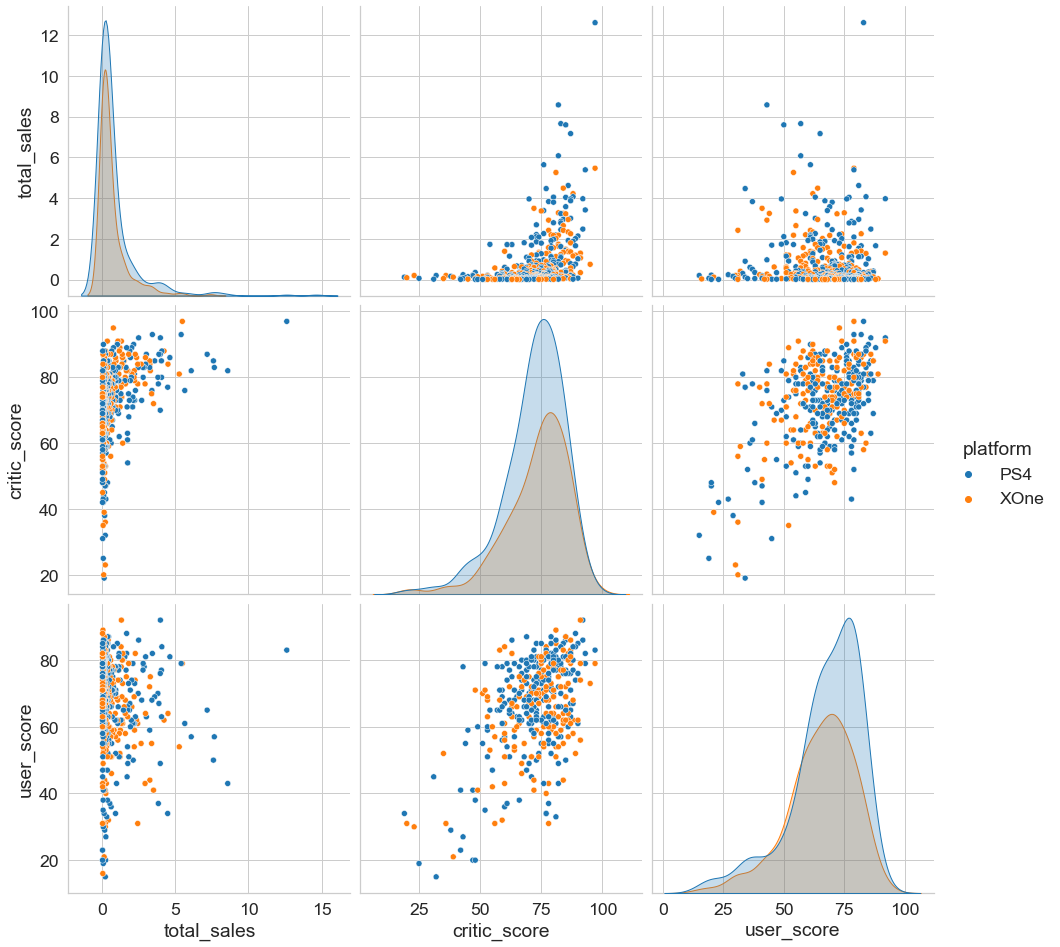

In [73]:
sns.pairplot(data.query("platform in ['PS4','XOne']"), dropna = True, height = 4.5, hue = 'platform', plot_kws = {'alpha': 1})


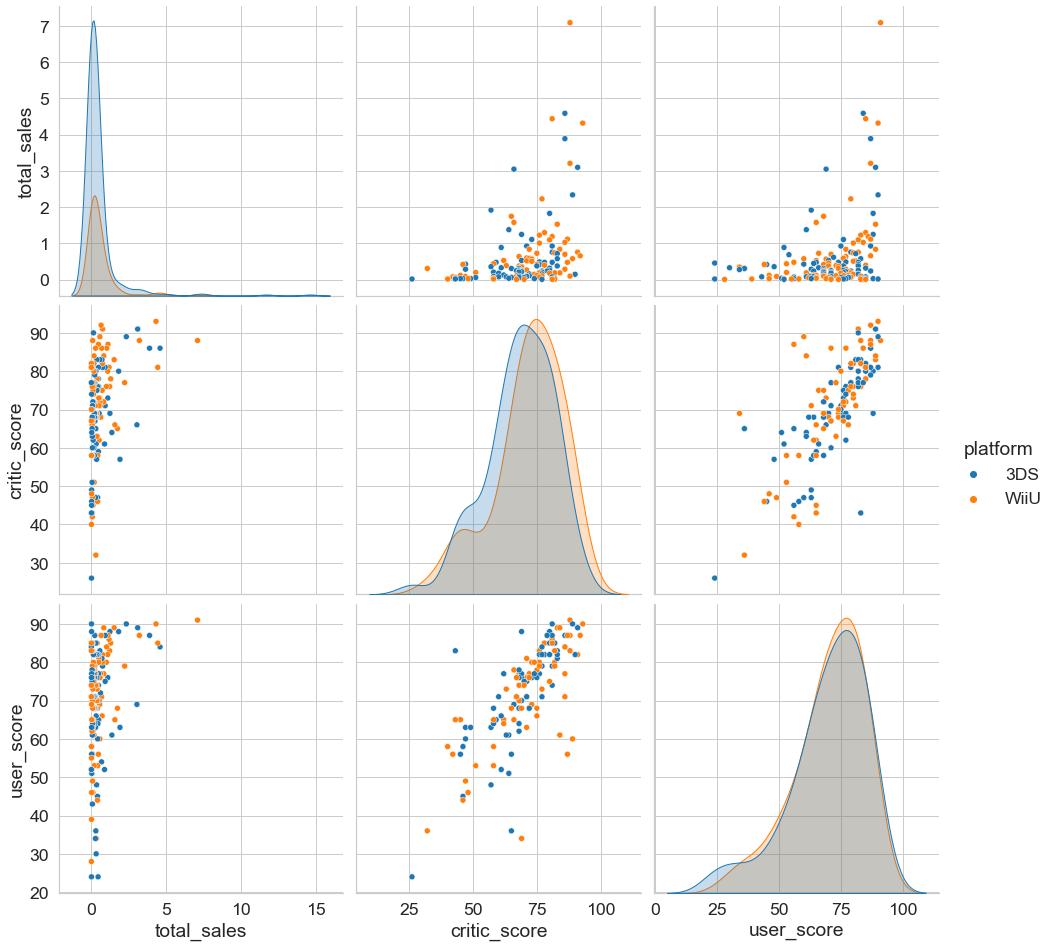

In [74]:
sns.pairplot(data.query("platform in ['WiiU','3DS']"), dropna = True, height = 4.5, hue = 'platform', plot_kws = {'alpha': 1})

### Вывод:

Рассмотрели влияние оценки критиков и пользователей на продажи игр.  

* Для платформ XOne и PS4 мнение критиков действительно немного влияет на продажи (Коэффиценты Пирсона по 0.4) Следовательно, если критик поставит высокую оценку, то шанс, что её купят будет немного выше. Насчет мнения пользователей нельзя ничего сказать, так как зависимось скорее всего не линейная в этом параметре, коэффициент пирсона < 0.1 к тому же отрицательный. Также оценки пользователей и оценки критиков не так уж и совпадают. (Коэффициент Пирсона около 0.5)  


* Для платформ WiiU и 3DS картина с критиками та же, но и мнение пользователей коррелирует с количеством продаж (коэффициент Пирсона 0.4). Также имеется довольно сильная взаимосвязь между мнениями критиков и пользователей ( коэффициент Пирсона 0.73) 

## Анализ продаж по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [75]:
data = df.groupby('genre').total_sales.agg(['count','sum']).sort_values(by = 'sum', ascending = False).reset_index().rename(columns = {'sum': 'total_sales'})
display(data)

,genre,count,total_sales
0,Action,3306,1716.50
1,Sports,2306,1309.67
2,Shooter,1296,1041.36
3,Role-Playing,1481,931.08
4,Platform,878,825.55
5,Misc,1721,790.29
6,Racing,1226,723.49
7,Fighting,837,442.66
8,Simulation,857,387.96
9,Puzzle,569,239.89


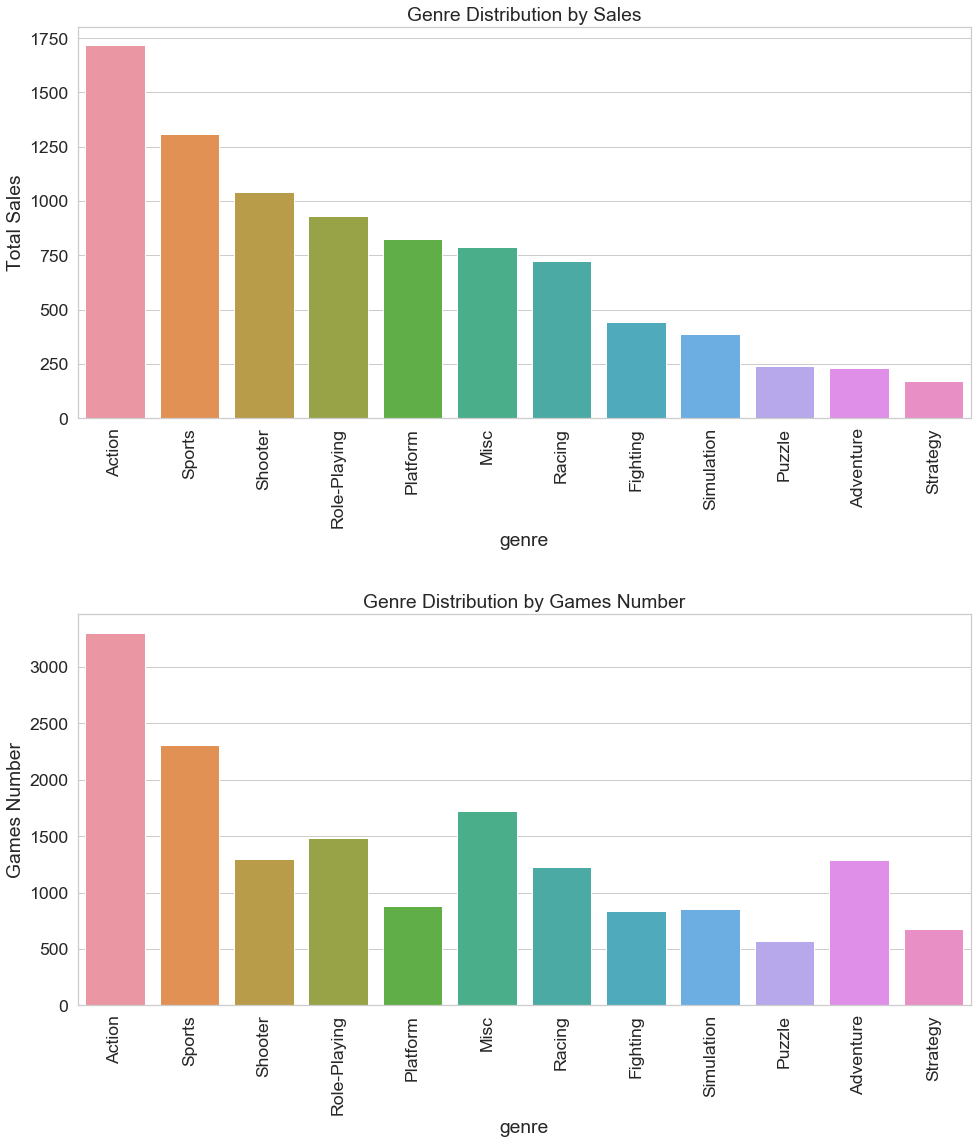

In [76]:
plt.figure(figsize = (16,18))
plt.subplot(2,1,1)
sns.barplot(data = data, x = 'genre', y = 'total_sales', ci = None)
plt.title('Genre Distribution by Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation = 90)


plt.subplot(2,1,2)
sns.barplot(data = data, x = 'genre', y = 'count', ci = None)
plt.title('Genre Distribution by Games Number')
plt.xticks(rotation = 90)
plt.ylabel('Games Number')
plt.subplots_adjust(hspace = 0.5)
plt.show()

### Вывод:

Взглянув на распределение по жанрам, явный лидер по продажам и количеству игр - жанр *Action*. 

Второе место по продажам занимает *Sports*.  

Третье место по продажам, но не по количеству игр занимает *Shooter*

Самый малопродающиеся жанры - *Strategy* и *Advanture*. Хотя жанр *Advanture* по количествам игр сравним с жанром *Shooter* и превосходит другие жанры. Но продажам это не помогло.

# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.


In [77]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [78]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
res = []
for region in regions:
    d1 = (df[['platform', region, 'genre']].groupby('platform')[region].sum().sort_values(ascending = False).head(5).reset_index())
    d2 = (df[['platform', region, 'genre']].groupby('genre')[region].sum().sort_values(ascending = False).head(5).reset_index())
    d3 = pd.concat([d1,d2], axis = 1, keys =['platform_rating','genre_rating'])
    res.append(d3)
    
pd.concat(res, axis = 1, keys = ['na','eu','jp'])

na                                             eu           \
  platform_rating          genre_rating          platform_rating            
         platform na_sales        genre na_sales        platform eu_sales   
0            X360   595.74       Action   863.17             PS2   332.63   
1             PS2   572.92       Sports   671.20             PS3   327.21   
2             Wii   486.87      Shooter   584.83            X360   268.32   
3             PS3   390.13     Platform   444.44             Wii   258.32   
4              DS   380.31         Misc   399.57              PS   212.39   

                                     jp                                  
  genre_rating          platform_rating           genre_rating           
         genre eu_sales        platform jp_sales         genre jp_sales  
0       Action   510.99              DS   175.00  Role-Playing   353.39  
1       Sports   371.33              PS   139.78        Action   160.12  
2      Shooter   314.52             PS2   137.54        Sports   134.93  
3       Racing   234.49            SNES   116.55      Platform   130.71  
4         Misc   210.60             3DS   100.62          Misc   107.02

### Вывод №1 (Игровая индустрия в общем за весь период): 

Как видно из приведенной таблицы выше, в игровой индустрии больше всего денег приносит Северная Америка, дальше Европа, потом Япония. 

По предпочтениям:

- В Северной Америке самая популярная платформа xbox360, чуть-чуть уступила PS2, а самый популярный жанр *Action*


- В Европе самая популярная платформа PS2, дальше PS3, а самый популярный жанр также *Action*. Также в Европе любят больше жанр *Racing*, за место *Platform* как в Северной Америке 


- В Японии ситуация в корне меняется, скорее всего из-за того, что она является родиной многих приставок:  
    - Самая популярная платформа *DS*, второе место занимает *PS*. Приставок xbox360 и Wii вообще не присутствует в рейтинге.  
    - Самый популярный жанр *Role-Playing*, который с отрывом больше чем в 2 раза вытеснил жанр *Action*. 
    - Также в списке лидеров отсутствует жанр *Shooter*, но остальные лидеры такие же как и в Северной Америке.

In [79]:
data = df.query('year_of_release >= 2013')
res = []
for region in regions:
    d1 = (data[['platform', region, 'genre']].groupby('platform')[region].sum().sort_values(ascending = False).head(5).reset_index())
    d2 = (data[['platform', region, 'genre']].groupby('genre')[region].sum().sort_values(ascending = False).head(5).reset_index())
    d3 = pd.concat([d1,d2], axis = 1, keys =['platform_rating','genre_rating'])
    res.append(d3)
    
pd.concat(res, axis = 1, keys = ['na','eu','jp'])

na                                              eu           \
  platform_rating           genre_rating          platform_rating            
         platform na_sales         genre na_sales        platform eu_sales   
0             PS4   108.74        Action   126.05             PS4   141.09   
1            XOne    93.12       Shooter   109.74             PS3    67.81   
2            X360    81.66        Sports    65.27            XOne    51.59   
3             PS3    63.50  Role-Playing    46.40            X360    42.52   
4             3DS    38.20          Misc    27.49             3DS    30.96   

                                      jp                                  
   genre_rating          platform_rating           genre_rating           
          genre eu_sales        platform jp_sales         genre jp_sales  
0        Action   118.13             3DS    67.81  Role-Playing    51.04  
1       Shooter    87.86             PS3    23.35        Action    40.49  
2        Sports    60.52             PSV    18.59          Misc     9.20  
3  Role-Playing    36.97             PS4    15.96      Fighting     7.65  
4        Racing    20.19            WiiU    10.88       Shooter     6.61

### Вывод №2 (Игровая индустрия за актуальный период): 

Как видно из приведенной таблицы выше, за актуальный период ситуация в корне поменялась.

По предпочтениям:

- Северная Америка:
    - В Северной Америке на лидирующую позицию вырвалась платформа *PS4*, с отставанием на 15 млн следует *XOne*
    - Самый популярный жанр остался *Action*. 
    - Жанр *Platform* с 4 строчки теперь заменился жанром *	Role-Playing*


- Европа:
    - В Европе с внушительным отрывом по продажам чуть больше чем в 2 раза устойчиво лидирующее место занимает платформа PS4, дальше PS3, а уже следом идёт линейка Xbox 
    - По жанрам ситуация аналогичная с Северной америкой, но на 5 строчке рейтинга за место *Misc* появился жанр *Racing*, что говорит о том, что в Европе этот жанр действительно популярен, и если делать игры в этом жанре, то ориентироваться нужно на Европу. 


- Япония: Ситуация снова сильно поменялась!
    - Самая популярная платформа *3DS* и по продажам обгоняет в 3 раза вторую по продажам платформу *PS3*, а третье место у 'PSV'. Отсюда явно можно сделать вывод о предпочтении японцев к карманным приставкам, нежели стационарных. Ну и лучше выпускать игры для платформы 3DS
    - Приставок серии xbox360 также не наблюдаем, но на последнем месте появилась WiiU.  
    - Самый популярный жанр остался *Role-Playing*, который оторвался на 10 млн от жанра *Action*. 
    - Также в списке лидеров все же появился жанр *Shooter*, но он уступил немного другому жанру *Fighting*
    - В Японии выделилось 2 основных жанра, которые очень популярны и приносят больше всего прибыли: *Role-Playing* (51.04) и *Action* (40.49)

##  Влияние возрастного рейтинга на продажи

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [80]:
display(data.rating.value_counts())

Неопределён    977
M              369
T              333
E              302
E10+           252
Name: rating, dtype: int64

,rating,na_sales,rating,eu_sales,rating,jp_sales
0,M,165.21,M,145.32,Неопределён,85.05
1,Неопределён,89.42,E,83.36,T,20.59
2,E,79.05,Неопределён,78.91,E,15.14
3,E10+,54.24,E10+,42.69,M,14.11
4,T,49.79,T,41.95,E10+,5.89


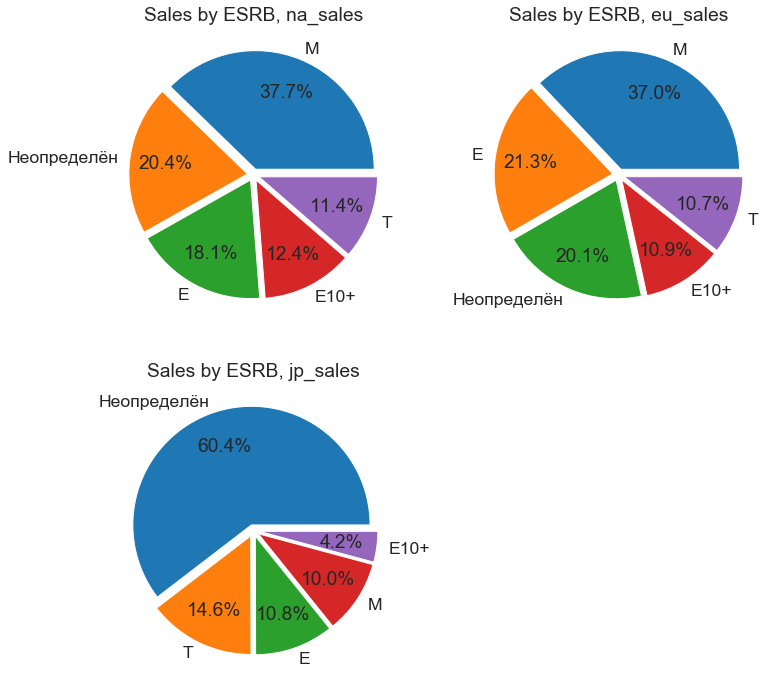

In [81]:
res = []
subplot_dict = {'na_sales': 221, 'eu_sales': 222, 'jp_sales': 223 }
plt.figure(figsize = (12,12))
for region in regions:
    d1 = (data[['platform', region, 'rating']].groupby('rating')[region].sum().sort_values(ascending = False).reset_index())
    res.append(d1)

    
    plt.subplot(subplot_dict[region])
    labels = d1.rating
    plt.pie(x=d1[region], autopct="%.1f%%", explode=[0.05]*len(labels), labels=labels, pctdistance=0.7)
    plt.title("Sales by ESRB, " + region);
    
    
pd.concat(res, axis = 1)

### Вывод: 

Видим долю продаж для различных регионов в зависимости от рейтинга ESRB по трем регионам.

В Северной Америке и Европе преобладает рейтинг M (Взрослые) и собирает по 30% продаж.  
В Японии самую большую долю продаж занимает неопределенный рейтинг. 

Насколько сильно влияние рейтинга на покупку игр, по таким данным сказать сложно. На мой взгляд рейтинг вообще не влияет на то, что покупают подростки для себя. Но как это проверить статистически, затрудняюсь пока это сделать.

# Шаг 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

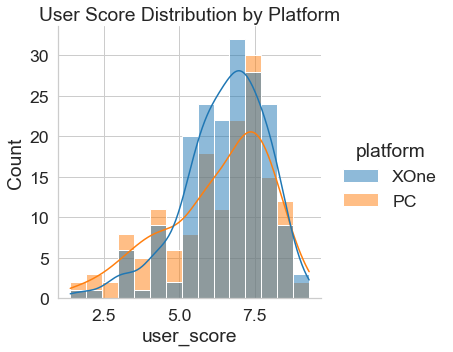

In [82]:
data.loc[data.user_score == 'tbd', 'user_score'] = np.nan
data.user_score = data.user_score.astype('float')
data.user_score.unique()
sns.displot(data = data.query("platform in ['XOne', 'PC']"), kde = True, x = 'user_score', hue = 'platform')
plt.title('User Score Distribution by Platform')
plt.show()

Нулевая Гипотеза H0: Средние двух генеральных совокупностей равны  
Альтернативная Гипотеза Н1: Средние двух генеральных совокупностей не равны

In [83]:
sample_1 = data.query("platform == 'XOne'")["user_score"].dropna()
sample_2 = data.query("platform =='PC'")["user_score"].dropna()

results = st.ttest_ind(sample_1, sample_2)
print('p-значение: ', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


### Вывод №1:

Гипотиза о том, что средние пользовательские рейтинги для платформ PC и XOne одинаковые, подтвердилась, мы её отвергнуть не смогли.

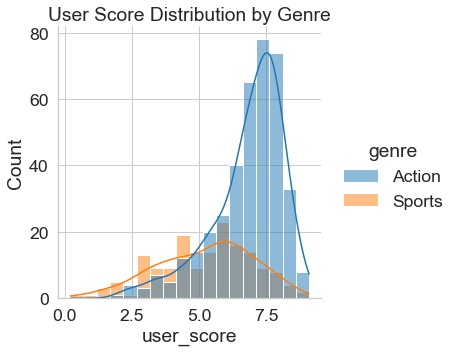

In [84]:
sns.displot(data = data.query("genre in ['Action', 'Sports']"), kde = True, x = 'user_score', hue = 'genre')
plt.title('User Score Distribution by Genre')
plt.show()

Нулевая Гипотеза H0: Средние двух генеральных совокупностей равны  
Альтернативная Гипотеза Н1: Средние двух генеральных совокупностей не равны

In [85]:
sample_1 = data.query("genre == 'Action'")["user_score"].dropna()
sample_2 = data.query("genre =='Sports'")["user_score"].dropna()

results = st.ttest_ind(sample_1, sample_2)
print('p-значение: ', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу


### Вывод №2:

Гипотиза о том, что средние пользовательские рейтинги для жанров Action и Sports Разные, подтвердилась, мы получили очень маленькое p-значение, которое говорит о том, что рейтинги очень сильно отличаются. 

# Шаг 6. Напишите общий вывод

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

-------

**Ошибки в данных:**

* Название столбцов начинались с заглавных букв, поэтому были заменены на нижний регистр.  

* Столбец год выпуска игры `Year_of_Release` сделали целочисленным  

* В столбце `user_score` есть достаточно много значений "tbd", которые означает, что возрастной рейтинг для игры должен быть определён. В приведенном анализе эти значения были заменены на Nan, чтобы по оставшимся данным делать числовые операции.  

* Пропуски в возрастной категории `rating` заменены на значение "Неопределён"  


**Анализ данных:**

* Были посчитанны суммарные продажи по всем регионам и добавлены в с толбец `total_sales`  

* **Анализ года релиза игр:**  

    * Временной диапазон данных 1980 - 2016гг.  
    * Данные раньше 1994 года очень малочисленны, выпускались меньше 100 игр в год.  
    * Были построены графики количества выпущенных игр по годам и полных продаж по годам.  
    
    В целом видно, что графики очень похожи и есть сильная корреляция (прямая зависимость от количества выпущенных игр и проданных копий). Единственное отличие (аномалия) - в 2000 году, когда количество игр осталось примерно на том же уровне по сравнению с 1999 годом, а количество проданных копий резко упало на 50 миллионов.  
    
    Ещё одно наблюдение, что после 2009 года (пик продаж и выпуска игр) идет довольно резкий спад в выпуске игр и продажах соответственно. С чем это связано сказать сложно, но на 2016 год количество продаж опустилось почти до уровня 1995 года.
    
    
* **Анализ продаж по различным платформам**  

    * **По количеству игр** в явных лидерах платформы DS, PS2 (по 2120 игр). Дальше идут платформы PS3, Wii, x360, PSP, PS по примерно 1200 игр и завершает линейку платформа PC с 1000 играми.  

    * **По продажам** имеем несколько иную картину:  
    У нас по продажам явный лидер - платформа PS2, Дальше за ней идут X360, PS3, Wii и DS.
    Компьютерная платформа PC по продажам очень сильно уступает по продажам игровым приставкам.
    
    * **Время жизни платформы:**  
    Если судить по линейке xbox, Wii, PS, то характерный срок жизни для данных платформ: 10-12 лет, переход на новую версию платформы происходит в среднем раз в 6 лет

* **Анализ продаж за актуальный период времени** 

    * Наблюдается явный спад продаж для всех платформ. Актуальный период для прогнозов на 2017 год взяли с 2013-2016 гг.  
    Были выделены наиболее перспективные платформы *XOne, PS4, 3DS, WiiU, PC*.

    Построили ящики с усами и violinplot для данных платформ, чтобы посмотреть как продаются отдельные игры за актуальный промежуток времени.  

    * Явно видим, что все продажи по играм не превышают обычно 1.75 миллионов копий. Все что выше - выбросы и скорее всего очень популярные  или эксклюзивные игры для данных платформ (Явно это видно для PS4 и для 3DS, где отдельные игры набрали около 12 и 14 млн долларов).
    * Распределения выглядят адекватно, имея пик отличный от нуля и длинный склон вправо. Однако для компьютерной платформы имеется ещё один небольшой пик в районе 1.25 миллионов копий, в отличие от других платформ.

    * Лидерами по продажам остаются XOne и PS4. Платформа WiiU имеет примерно такие же продажи за этот промежуток времени, но в динамике мы видели резкий упадок продаж игр на эту платформу в 2016 году, когда количество проданных игр уступила даже платформе PC. 
    
    
* **Анализ влияния оценки критиков и пользователей на продажи игр:**  

    * Для платформ XOne и PS4 мнение критиков действительно немного влияет на продажи (Коэффиценты Пирсона по 0.4) Следовательно, если критик поставит высокую оценку, то шанс, что её купят будет немного выше. Насчет мнения пользователей нельзя ничего сказать, так как зависимось скорее всего не линейная в этом параметре, коэффициент пирсона < 0.1 к тому же отрицательный. Также оценки пользователей и оценки критиков не так уж и совпадают. (Коэффициент Пирсона около 0.5)  

    * Для платформ WiiU и 3DS картина с критиками та же, но и мнение пользователей коррелирует с количеством продаж (коэффициент Пирсона 0.4). Также имеется довольно сильная взаимосвязь между мнениями критиков и пользователей ( коэффициент Пирсона 0.73) 
    
    
* **Анализ продаж по жанрам:**

    * Явный лидер по продажам и количеству игр - жанр *Action*. 

    * Второе место по продажам занимает *Sports*.  

    * Третье место по продажам, но не по количеству игр занимает *Shooter*

    * Самый малопродающиеся жанры - *Strategy* и *Advanture*. Хотя жанр *Advanture* по количествам игр сравним с жанром *Shooter* и превосходит другие жанры. Но продажам это не помогло.
    
    
* **Анализ портрета пользователя каждого региона:**

    - Северная Америка:
        * В Северной Америке на лидирующую позицию вырвалась платформа *PS4*, с отставанием на 15 млн следует *XOne*
        * Самый популярный жанр остался *Action*. 
        * Жанр *Platform* с 4 строчки теперь заменился жанром *	Role-Playing*

    - Европа:
        - В Европе с внушительным отрывом по продажам чуть больше чем в 2 раза устойчиво лидирующее место занимает платформа PS4, дальше PS3, а уже следом идёт линейка Xbox 
        - По жанрам ситуация аналогичная с Северной америкой, но на 5 строчке рейтинга за место *Misc* появился жанр *Racing*, что говорит о том, что в Европе этот жанр действительно популярен, и если делать игры в этом жанре, то ориентироваться нужно на Европу. 

    - Япония:
        - Самая популярная платформа *3DS* и по продажам обгоняет в 3 раза вторую по продажам платформу *PS3*, а третье место у 'PSV'. Отсюда явно можно сделать вывод о предпочтении японцев к карманным приставкам, нежели стационарных. Ну и лучше выпускать игры для платформы 3DS
        - Приставок серии xbox360 также не наблюдаем, но на последнем месте появилась WiiU.  
        - Самый популярный жанр остался *Role-Playing*, который оторвался на 10 млн от жанра *Action*. 
        - Также в списке лидеров все же появился жанр *Shooter*, но он уступил немного другому жанру *Fighting*
        - В Японии выделилось 2 основных жанра, которые очень популярны и приносят больше всего прибыли: *Role-Playing* (51.04) и *Action* (40.49)
        
* **Проверены гипотезы**

    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
      Гипотиза о том, что средние пользовательские рейтинги для платформ PC и XOne одинаковые, подтвердилась, мы её отвергнуть не смогли.

    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
      Гипотиза о том, что средние пользовательские рейтинги для жанров Action и Sports Разные, подтвердилась, мы получили очень маленькое p-значение, которое говорит о том, что рейтинги очень сильно отличаются. 
